# A very basic implementation of Naive Bayes models (and other models for comparison) for spam classification.

#### Prepared by: Dale Garcia

Sources:

- [From this kaggle post](https://www.kaggle.com/imanjowkar/nlp-02)
- [This sklearn documentation about NB](https://scikit-learn.org/stable/modules/naive_bayes.html)
- [This sklearn documentation about CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- [Another sklearn page](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py)
- [Another sklearn page?? Wow it seems like you can learn alot from sklearn's website!](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
nltk.download('stopwords')

from sklearn.metrics import accuracy_score, classification_report
import timeit

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dalegarcia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Fix the dataset link!
spam_data = pd.read_csv("../Datasets/uci_spam/spam.csv",
                  encoding='latin1')

spam_data = spam_data.iloc[:,:2]
spam_data.columns = ['category', 'text']

In [3]:
spam_data

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<AxesSubplot:>

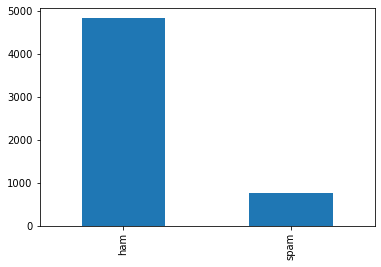

In [4]:
category_distribution = spam_data['category'].value_counts()
category_distribution.plot(kind='bar')

In [5]:
pcc = (category_distribution/category_distribution.sum())**2
pcc = np.sum(pcc)*1.25
pcc

0.9597744033726217

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords

In [7]:
stop = stopwords.words('english')
cvec = CountVectorizer(stop_words=stop,
                       lowercase=True,
                       binary=True,
                       encoding='latin1')

# add regex for token pattern (?)

In [8]:
bow = cvec.fit_transform(spam_data['text'])

In [9]:
spam_bow = pd.DataFrame(data=bow.todense(),
                       columns=cvec.get_feature_names_out())

In [10]:
spam_bow.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
spam_bow['target'] = spam_data['category']

In [12]:
X = spam_bow.drop('target', axis=1)
y = spam_bow['target']


In [13]:
def run_clf(clf, return_pred=False):
    start = timeit.default_timer()
    print(clf)
    print("\n")
    clf.fit(X,y)
    y_pred = clf.predict(X)
    
    print("Accuracy: ", accuracy_score(y, y_pred))
    print("\n")
    print(classification_report(y, y_pred, labels=clf.classes_))
    print("\n")
    print("Runtime:", timeit.default_timer()-start)
    if return_pred:
        return y_pred

In [14]:
run_clf(BernoulliNB())

BernoulliNB()


Accuracy:  0.9886934673366834


              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      4825
        spam       1.00      0.92      0.96       747

    accuracy                           0.99      5572
   macro avg       0.99      0.96      0.97      5572
weighted avg       0.99      0.99      0.99      5572



Runtime: 1.613781791


In [15]:
run_clf(MultinomialNB())

MultinomialNB()


Accuracy:  0.9937185929648241


              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      4825
        spam       0.98      0.98      0.98       747

    accuracy                           0.99      5572
   macro avg       0.99      0.99      0.99      5572
weighted avg       0.99      0.99      0.99      5572



Runtime: 0.5676595419999995


In [16]:
run_clf(ComplementNB())

ComplementNB()


Accuracy:  0.9781048097631012


              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      4825
        spam       0.87      0.99      0.92       747

    accuracy                           0.98      5572
   macro avg       0.93      0.98      0.96      5572
weighted avg       0.98      0.98      0.98      5572



Runtime: 0.5435704169999998


In [17]:
# Let's try the models tried in class
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.ensemble import RandomForestClassifier, \
        GradientBoostingClassifier

In [18]:
run_clf(GaussianNB())

GaussianNB()


Accuracy:  0.9364680545585068


              precision    recall  f1-score   support

         ham       1.00      0.93      0.96      4825
        spam       0.68      1.00      0.81       747

    accuracy                           0.94      5572
   macro avg       0.84      0.96      0.89      5572
weighted avg       0.96      0.94      0.94      5572



Runtime: 1.8473042920000005


In [19]:
run_clf(CategoricalNB())

CategoricalNB()


Accuracy:  0.9886934673366834


              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      4825
        spam       1.00      0.92      0.96       747

    accuracy                           0.99      5572
   macro avg       0.99      0.96      0.97      5572
weighted avg       0.99      0.99      0.99      5572



Runtime: 1.8870178749999988


In [20]:
# How do the other classifiers we studied perform?

from sklearn.linear_model import LogisticRegression

In [21]:
run_clf(LogisticRegression(penalty='l1', solver='liblinear'))

LogisticRegression(penalty='l1', solver='liblinear')


Accuracy:  0.9917444364680545


              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      4825
        spam       1.00      0.94      0.97       747

    accuracy                           0.99      5572
   macro avg       0.99      0.97      0.98      5572
weighted avg       0.99      0.99      0.99      5572



Runtime: 0.6892185410000007


In [22]:
run_clf(LogisticRegression(penalty='l2'))

LogisticRegression()


Accuracy:  0.9965900933237617


              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      4825
        spam       1.00      0.97      0.99       747

    accuracy                           1.00      5572
   macro avg       1.00      0.99      0.99      5572
weighted avg       1.00      1.00      1.00      5572



Runtime: 1.771663083


In [23]:
run_clf(RandomForestClassifier(max_depth=5))

RandomForestClassifier(max_depth=5)


Accuracy:  0.8671931083991385


              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      4825
        spam       1.00      0.01      0.02       747

    accuracy                           0.87      5572
   macro avg       0.93      0.50      0.47      5572
weighted avg       0.88      0.87      0.81      5572



Runtime: 1.4291354999999992


In [24]:
# This is very slow!!
run_clf(GradientBoostingClassifier(max_depth=5))

GradientBoostingClassifier(max_depth=5)


Accuracy:  0.9931801866475233


              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      4825
        spam       1.00      0.95      0.97       747

    accuracy                           0.99      5572
   macro avg       1.00      0.98      0.99      5572
weighted avg       0.99      0.99      0.99      5572



Runtime: 123.95849525


#### KFOLD TIME!

Let's run some stratified KFold to find the best models (accuracy only tho)

I also removed CategoricalNB since it was throwing an IndexError and I'm too lazy to solve the issue right now

Note: I think logloss might be a better metric here

In [25]:
from sklearn.model_selection import StratifiedKFold

clfs = [MultinomialNB(),
       BernoulliNB(),
       ComplementNB(),
       GaussianNB(),
       LogisticRegression(penalty='l2'),
       RandomForestClassifier(max_depth=5)]

skf = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)

_df = pd.DataFrame(index=[str(x) for x in clfs])
_df['Train acc'] = None
_df['Test acc'] = None

for _clf in clfs:
    tr_acc = []
    ts_acc = []
    clf_name = str(_clf)
    for train_idx, test_idx in skf.split(X,y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        _clf.fit(X_train, y_train)
        tr_acc.append(_clf.score(X_train, y_train))
        
        _y_pred = _clf.predict(X_test)
        ts_acc.append(accuracy_score(y_test, _y_pred))
        
    _df.loc[clf_name, 'Train acc'] = np.mean(tr_acc)
    _df.loc[clf_name, 'Test acc'] = np.mean(ts_acc)
        


In [26]:
_df

,Train acc,Test acc
MultinomialNB(),0.994855,0.981156
BernoulliNB(),0.984745,0.976669
ComplementNB(),0.985044,0.946339
GaussianNB(),0.945501,0.897164
LogisticRegression(),0.99653,0.981335
RandomForestClassifier(max_depth=5),0.867432,0.867193


<AxesSubplot:>

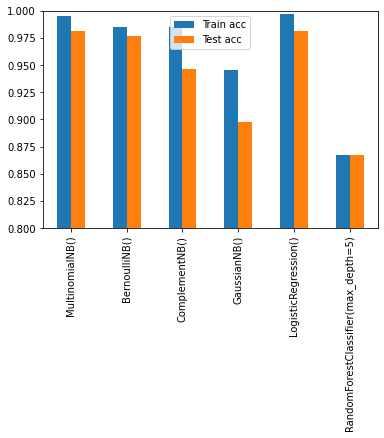

In [27]:
_df.plot(kind='bar', ylim=(0.8,1))

#### Let's try log loss!
Log loss is kinda like accuracy. But it harshly penalizes wrong predictions and not-so-certain correct predictions. Basically we want our guesses to be very confident. We use the `predict_proba` method of our NB classifiers. See this [link](https://www.kaggle.com/ikennaanigbogu/understanding-logloss) for more info.

Note: **Lower log loss is better!** The closer it is to 0, the better it is. (It has no upper bound)

In [28]:
from sklearn.metrics import log_loss
from scipy.stats import hmean

In [29]:

clfs = [MultinomialNB(),
       BernoulliNB(),
       ComplementNB(),
       GaussianNB()]

skf = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)

_df = pd.DataFrame(index=[str(x) for x in clfs])
_df['Train logloss'] = None
_df['Test logloss'] = None

for _clf in clfs:
    tr_logloss = []
    ts_logloss = []
    clf_name = str(_clf)
    for train_idx, test_idx in skf.split(X,y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        _clf.fit(X_train, y_train)
        tr_logloss.append(log_loss(y_train,
                                   _clf.predict_proba(X_train)))
        
        _y_pred = _clf.predict(X_test)
        ts_logloss.append(log_loss(y_test,
                                  _clf.predict_proba(X_test)))
        
    _df.loc[clf_name, 'Train logloss'] = hmean(tr_logloss)
    _df.loc[clf_name, 'Test logloss'] = hmean(ts_logloss)
        


In [30]:
_df

,Train logloss,Test logloss
MultinomialNB(),0.0239002,0.0659888
BernoulliNB(),0.120698,0.184416
ComplementNB(),0.0577046,0.135897
GaussianNB(),1.88035,3.5402


<AxesSubplot:>

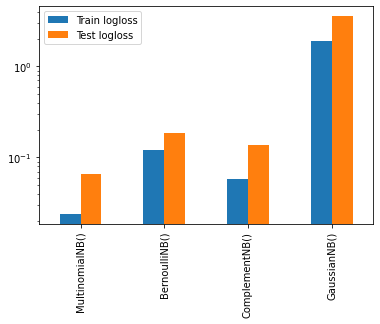

In [33]:
_df.plot(kind='bar', logy=True)